## What is NLP (Natural Language Processing)?

Natural language processing (NLP) refers to the branch of computer science—and more specifically, the branch of artificial intelligence concerned with giving computers the ability to understand text and spoken words in much the same way human beings can.

### Some NLP tasks

* automatic translation
* speech recognition
* question answering
* text summarization
* sentiment analysis
* topic modelling
* Named Entity Recognition (NER)
* speech to text and text to speech
* text and question generatiion
* error correction
* Word Sense Disambiguation



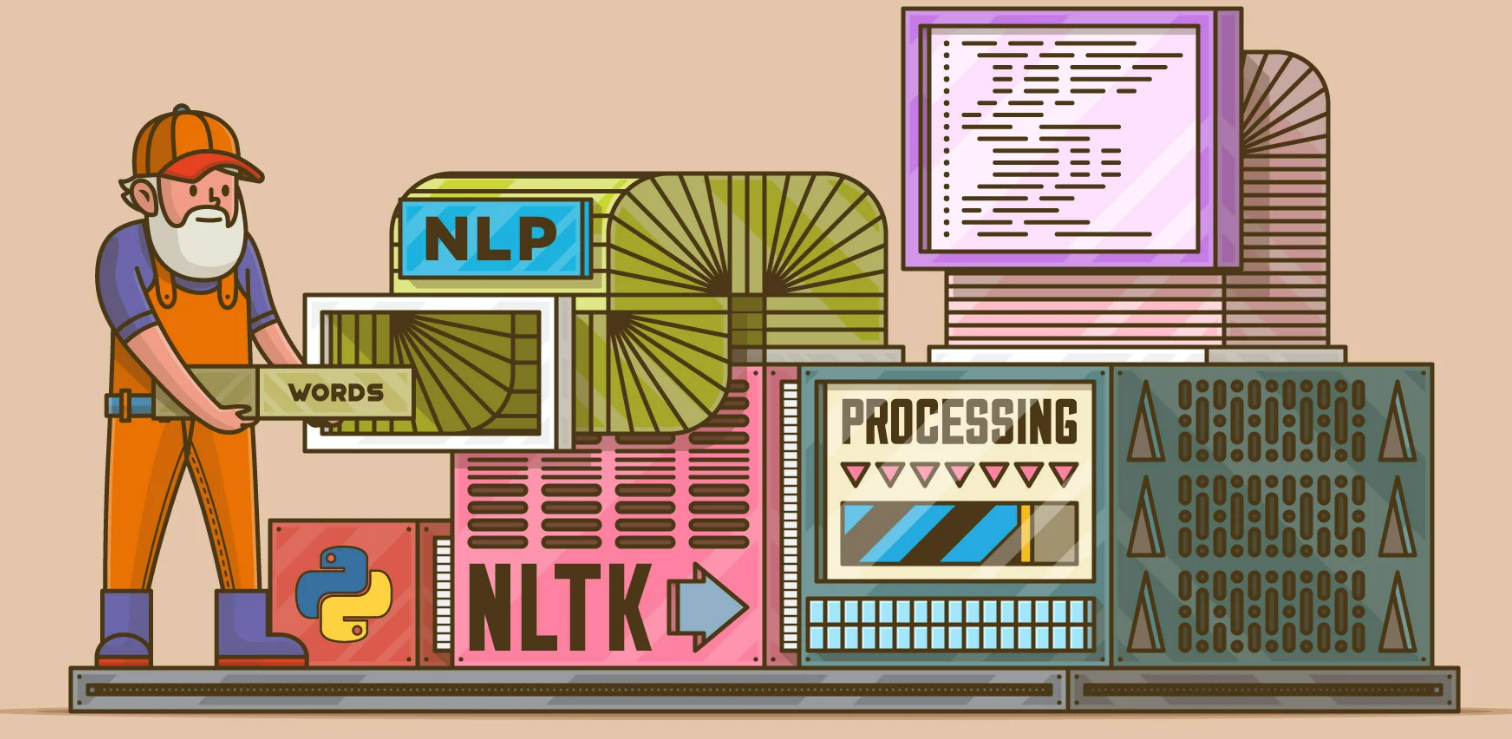

In [1]:
from IPython.display import Image
Image("data/nlp.PNG")

### What is text pre-processing and why do we need it?

Most of the time, the texts that we need to analyze, or - the data we have, is not in an ideal state. It is often the case that when doing NLP related tasks, we tend to underestimate the time and effort needed to get the data (the texts) into a state in which they are ready for further analysis or prediction.

Text pre-processing is often the first and <b> a very important </b>, (although perhaps not very interesting) step of any NLP task. 

For computers, understanding human language is not the easiest task. Computers can easily understands <b> structured </b> data, such as spreadsheets, or tables in a database.

However, language - whether in a written form (such as tweets, articles, reviews, novels, poems, plays, etc.) or in a spoken form is compeletly <b>unstructured </b>. Pre- procssing transforms text into a more digestible form for the computer, so that our NLP methods (based on machine-learning algorithms, e.g.) can preform better.

It is sometimes a real effort to discover in which ways our data is messy, and to think about how we can clean it.

However, it is really important to put in that work, because if our data isn't <i> clean </i>, the results of our analysis won't be <i>clean</i> either.

The pre-processing steps for a problem depend mainly on the domain and the problem itself, hence, we don’t need to apply all steps to every problem. 

In this notebook, some of the common pre-processing steps will be named. Depending on your data and your task (as well as the NLP method you plan to use) you will need only some or every step in this guide.


### Pre-processing steps

* lower casing
* tokenization
* removing punctuation
* removing URLs
* removing stop words
* stemming
* lemmatization

### Importing libraries (that might be familiar) we need for this

We can also do this stuff by ourselves, and not use libraries. Usually, the idea is not to reinvent the wheel, but if you see that something works better when you do it - then do it yourself :)

In [1]:
import nltk
import string
import re

### Reading in our text

In [3]:
with open('data/cactus.txt') as fh:
    text = fh.read()

text

'Once upon a time, in a desert far away, there was a rose who was so proud of her beautiful looks. Her only complaint was growing next to an ugly cactus.\n\nEvery day, the beautiful rose would insult and mock the cactus on his looks, all while the cactus remained quiet. All the other plants nearby tried to make the rose see sense, but she was too swayed by her own looks.\n\nOne scorching summer, the desert became dry, and there was no water left for the plants. The rose quickly began to wilt. Her beautiful petals dried up, losing their lush color.\n\nLooking to the cactus, she saw a sparrow dip his beak into the cactus to drink some water. Though ashamed, the rose asked the cactus if she could have some water. The kind cactus readily agreed, helping them both through the tough summer, as friends.'

### Removing newline characters

We can do this many ways, but one is using the ```replace()``` string method.

In [4]:
text = text.replace("\n", "")
text


'Once upon a time, in a desert far away, there was a rose who was so proud of her beautiful looks. Her only complaint was growing next to an ugly cactus.Every day, the beautiful rose would insult and mock the cactus on his looks, all while the cactus remained quiet. All the other plants nearby tried to make the rose see sense, but she was too swayed by her own looks.One scorching summer, the desert became dry, and there was no water left for the plants. The rose quickly began to wilt. Her beautiful petals dried up, losing their lush color.Looking to the cactus, she saw a sparrow dip his beak into the cactus to drink some water. Though ashamed, the rose asked the cactus if she could have some water. The kind cactus readily agreed, helping them both through the tough summer, as friends.'

### Changing to lower/upper case

Usually, we would need to change to lowercase. This is because 'Happy' and 'happy' are the same word, but since they are spelled differently, the computer would count it as two. We lowercase the text to reduce the size of the vocabulary of our text data.

```lower()``` and  ```upper()``` are string methods.

In [5]:
def text_lowercase(text):
    return text.lower()

In [6]:
lower_text = text_lowercase(text)
lower_text

'once upon a time, in a desert far away, there was a rose who was so proud of her beautiful looks. her only complaint was growing next to an ugly cactus.every day, the beautiful rose would insult and mock the cactus on his looks, all while the cactus remained quiet. all the other plants nearby tried to make the rose see sense, but she was too swayed by her own looks.one scorching summer, the desert became dry, and there was no water left for the plants. the rose quickly began to wilt. her beautiful petals dried up, losing their lush color.looking to the cactus, she saw a sparrow dip his beak into the cactus to drink some water. though ashamed, the rose asked the cactus if she could have some water. the kind cactus readily agreed, helping them both through the tough summer, as friends.'

### Tokenization

We can also do this with the string ```split()``` method as well as e.g. ```sent_tokenize()``` from the package nltk.
There's many ways to do it - but the main idea is - if we want to make a word-based, or sentence-based analysis (e.g. this makes sense for sentiment analysis), we need to split our text.

In [7]:
sentences = lower_text.split('.')

In [8]:
sentences

['once upon a time, in a desert far away, there was a rose who was so proud of her beautiful looks',
 ' her only complaint was growing next to an ugly cactus',
 'every day, the beautiful rose would insult and mock the cactus on his looks, all while the cactus remained quiet',
 ' all the other plants nearby tried to make the rose see sense, but she was too swayed by her own looks',
 'one scorching summer, the desert became dry, and there was no water left for the plants',
 ' the rose quickly began to wilt',
 ' her beautiful petals dried up, losing their lush color',
 'looking to the cactus, she saw a sparrow dip his beak into the cactus to drink some water',
 ' though ashamed, the rose asked the cactus if she could have some water',
 ' the kind cactus readily agreed, helping them both through the tough summer, as friends',
 '']

We see here that theres trailing whitespaces in our list items.
Let's remove them by remembering list comprehension:

In [9]:
stripped = [s.strip() for s in sentences]
stripped

['once upon a time, in a desert far away, there was a rose who was so proud of her beautiful looks',
 'her only complaint was growing next to an ugly cactus',
 'every day, the beautiful rose would insult and mock the cactus on his looks, all while the cactus remained quiet',
 'all the other plants nearby tried to make the rose see sense, but she was too swayed by her own looks',
 'one scorching summer, the desert became dry, and there was no water left for the plants',
 'the rose quickly began to wilt',
 'her beautiful petals dried up, losing their lush color',
 'looking to the cactus, she saw a sparrow dip his beak into the cactus to drink some water',
 'though ashamed, the rose asked the cactus if she could have some water',
 'the kind cactus readily agreed, helping them both through the tough summer, as friends',
 '']

deleting the empty list item:

In [11]:
new_list = [x for x in stripped if x != '']
new_list

['once upon a time, in a desert far away, there was a rose who was so proud of her beautiful looks',
 'her only complaint was growing next to an ugly cactus',
 'every day, the beautiful rose would insult and mock the cactus on his looks, all while the cactus remained quiet',
 'all the other plants nearby tried to make the rose see sense, but she was too swayed by her own looks',
 'one scorching summer, the desert became dry, and there was no water left for the plants',
 'the rose quickly began to wilt',
 'her beautiful petals dried up, losing their lush color',
 'looking to the cactus, she saw a sparrow dip his beak into the cactus to drink some water',
 'though ashamed, the rose asked the cactus if she could have some water',
 'the kind cactus readily agreed, helping them both through the tough summer, as friends']

As we said in the previous notebook, we can also used the ```re``` module for tokenization (splitting):

In [12]:
sentences = re.split(r'[.?!]\s*', lower_text)
sentences

['once upon a time, in a desert far away, there was a rose who was so proud of her beautiful looks',
 'her only complaint was growing next to an ugly cactus',
 'every day, the beautiful rose would insult and mock the cactus on his looks, all while the cactus remained quiet',
 'all the other plants nearby tried to make the rose see sense, but she was too swayed by her own looks',
 'one scorching summer, the desert became dry, and there was no water left for the plants',
 'the rose quickly began to wilt',
 'her beautiful petals dried up, losing their lush color',
 'looking to the cactus, she saw a sparrow dip his beak into the cactus to drink some water',
 'though ashamed, the rose asked the cactus if she could have some water',
 'the kind cactus readily agreed, helping them both through the tough summer, as friends',
 '']

Or, NLTK:

In [13]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [14]:
sentences = sent_tokenize(lower_text)
sentences


['once upon a time, in a desert far away, there was a rose who was so proud of her beautiful looks.',
 'her only complaint was growing next to an ugly cactus.every day, the beautiful rose would insult and mock the cactus on his looks, all while the cactus remained quiet.',
 'all the other plants nearby tried to make the rose see sense, but she was too swayed by her own looks.one scorching summer, the desert became dry, and there was no water left for the plants.',
 'the rose quickly began to wilt.',
 'her beautiful petals dried up, losing their lush color.looking to the cactus, she saw a sparrow dip his beak into the cactus to drink some water.',
 'though ashamed, the rose asked the cactus if she could have some water.',
 'the kind cactus readily agreed, helping them both through the tough summer, as friends.']

If we wanted to have the words as list elements (word tokenization):

In [15]:
words = word_tokenize (lower_text)
words


['once',
 'upon',
 'a',
 'time',
 ',',
 'in',
 'a',
 'desert',
 'far',
 'away',
 ',',
 'there',
 'was',
 'a',
 'rose',
 'who',
 'was',
 'so',
 'proud',
 'of',
 'her',
 'beautiful',
 'looks',
 '.',
 'her',
 'only',
 'complaint',
 'was',
 'growing',
 'next',
 'to',
 'an',
 'ugly',
 'cactus.every',
 'day',
 ',',
 'the',
 'beautiful',
 'rose',
 'would',
 'insult',
 'and',
 'mock',
 'the',
 'cactus',
 'on',
 'his',
 'looks',
 ',',
 'all',
 'while',
 'the',
 'cactus',
 'remained',
 'quiet',
 '.',
 'all',
 'the',
 'other',
 'plants',
 'nearby',
 'tried',
 'to',
 'make',
 'the',
 'rose',
 'see',
 'sense',
 ',',
 'but',
 'she',
 'was',
 'too',
 'swayed',
 'by',
 'her',
 'own',
 'looks.one',
 'scorching',
 'summer',
 ',',
 'the',
 'desert',
 'became',
 'dry',
 ',',
 'and',
 'there',
 'was',
 'no',
 'water',
 'left',
 'for',
 'the',
 'plants',
 '.',
 'the',
 'rose',
 'quickly',
 'began',
 'to',
 'wilt',
 '.',
 'her',
 'beautiful',
 'petals',
 'dried',
 'up',
 ',',
 'losing',
 'their',
 'lush',
 '

### Removing punctuation

Something from the previous notebook (converting multiple whitespaces and tabs to one, and then splitting and replacing the punctuation using the re module)

In [16]:
with open('data/cactus.txt') as fh:
    text = fh.read()
text = re.sub('\s+', ' ', text)    
sentences = re.split(r'[\.\?\!]\s*', text)
print(sentences[:2])


['Once upon a time, in a desert far away, there was a rose who was so proud of her beautiful looks', 'Her only complaint was growing next to an ugly cactus']


In [17]:
words = [w for w in words if w not in string.punctuation]
words

['once',
 'upon',
 'a',
 'time',
 'in',
 'a',
 'desert',
 'far',
 'away',
 'there',
 'was',
 'a',
 'rose',
 'who',
 'was',
 'so',
 'proud',
 'of',
 'her',
 'beautiful',
 'looks',
 'her',
 'only',
 'complaint',
 'was',
 'growing',
 'next',
 'to',
 'an',
 'ugly',
 'cactus.every',
 'day',
 'the',
 'beautiful',
 'rose',
 'would',
 'insult',
 'and',
 'mock',
 'the',
 'cactus',
 'on',
 'his',
 'looks',
 'all',
 'while',
 'the',
 'cactus',
 'remained',
 'quiet',
 'all',
 'the',
 'other',
 'plants',
 'nearby',
 'tried',
 'to',
 'make',
 'the',
 'rose',
 'see',
 'sense',
 'but',
 'she',
 'was',
 'too',
 'swayed',
 'by',
 'her',
 'own',
 'looks.one',
 'scorching',
 'summer',
 'the',
 'desert',
 'became',
 'dry',
 'and',
 'there',
 'was',
 'no',
 'water',
 'left',
 'for',
 'the',
 'plants',
 'the',
 'rose',
 'quickly',
 'began',
 'to',
 'wilt',
 'her',
 'beautiful',
 'petals',
 'dried',
 'up',
 'losing',
 'their',
 'lush',
 'color.looking',
 'to',
 'the',
 'cactus',
 'she',
 'saw',
 'a',
 'sparro

### Removing stopwords

In the file `data/stopwords.txt` we have a list of stopwords for the English language. Let's try to clean our tokens from these words. For this we have to read the stopword list first:

In [20]:
with open('data/stopwords.txt') as fp:
    stopwords = [word.strip() for word in fp.readlines()]
    
stopwords    

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'her',
 'hers',
 'herself',
 'it',
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'no',
 'nor',
 '

Now to remove the stopwords from the list `tokens` we can use a List Comprension:

In [21]:
print(len(words)) 
tokens = [token for token in words if token not in stopwords]
len(tokens)


145


75

In [22]:
tokens

['upon',
 'time',
 'desert',
 'far',
 'away',
 'rose',
 'proud',
 'beautiful',
 'looks',
 'complaint',
 'growing',
 'next',
 'ugly',
 'cactus.every',
 'day',
 'beautiful',
 'rose',
 'would',
 'insult',
 'mock',
 'cactus',
 'looks',
 'cactus',
 'remained',
 'quiet',
 'plants',
 'nearby',
 'tried',
 'make',
 'rose',
 'see',
 'sense',
 'swayed',
 'looks.one',
 'scorching',
 'summer',
 'desert',
 'became',
 'dry',
 'water',
 'left',
 'plants',
 'rose',
 'quickly',
 'began',
 'wilt',
 'beautiful',
 'petals',
 'dried',
 'losing',
 'lush',
 'color.looking',
 'cactus',
 'saw',
 'sparrow',
 'dip',
 'beak',
 'cactus',
 'drink',
 'water',
 'though',
 'ashamed',
 'rose',
 'asked',
 'cactus',
 'could',
 'water',
 'kind',
 'cactus',
 'readily',
 'agreed',
 'helping',
 'tough',
 'summer',
 'friends']

### Stemming

Stemming is the process of getting the root form of a word. Stem or root is the part to which inflectional affixes (-ed, -ize, -de, -s, etc.) are added. The stem of a word is created by removing the prefix or suffix of a word. So, stemming a word may not result in actual words.

<u>Example</u>:

```
books      --->    book
looked     --->    look
denied     --->    deni
flies      --->    fli
```


In [23]:
from nltk.stem.porter import PorterStemmer

Porter stemmer algorithm is a pretty standard (from 1979) solution for stemming (https://tartarus.org/martin/PorterStemmer/).  

In [24]:
stemmer = PorterStemmer()
stems = [stemmer.stem(word) for word in tokens]
stems


['upon',
 'time',
 'desert',
 'far',
 'away',
 'rose',
 'proud',
 'beauti',
 'look',
 'complaint',
 'grow',
 'next',
 'ugli',
 'cactus.everi',
 'day',
 'beauti',
 'rose',
 'would',
 'insult',
 'mock',
 'cactu',
 'look',
 'cactu',
 'remain',
 'quiet',
 'plant',
 'nearbi',
 'tri',
 'make',
 'rose',
 'see',
 'sens',
 'sway',
 'looks.on',
 'scorch',
 'summer',
 'desert',
 'becam',
 'dri',
 'water',
 'left',
 'plant',
 'rose',
 'quickli',
 'began',
 'wilt',
 'beauti',
 'petal',
 'dri',
 'lose',
 'lush',
 'color.look',
 'cactu',
 'saw',
 'sparrow',
 'dip',
 'beak',
 'cactu',
 'drink',
 'water',
 'though',
 'asham',
 'rose',
 'ask',
 'cactu',
 'could',
 'water',
 'kind',
 'cactu',
 'readili',
 'agre',
 'help',
 'tough',
 'summer',
 'friend']

### Lemmatization

Like stemming, lemmatization also converts a word to its root form. However,l emmatization is a more powerful operation, and it takes into consideration morphological analysis of the words. It returns the lemma which is the base form of all its inflectional forms. Lemmatization ensures that the root word belongs to the language. We will get valid words if we use lemmatization. 



E.g.

```
books      --->    book
looked     --->    look
denied     --->    deny
flies      --->    fly
```


In NLTK, we use the WordNetLemmatizer to get the lemmas of words. 

In [25]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

In [26]:
lemmatizer = WordNetLemmatizer()

In order to achieve lemmatization, we also need Part-Of-Speech tagging. 
What is this and why do we need it?
POS-tagging refers to categorizing words in a text (corpus) in correspondence with a particular part of speech, depending on the definition of the word and its context (verbs, nouns, etc.). This allows us to preform lemmatization, since the lemma depends on the part of speech.

In [28]:
# This is a helper function to map NTLK position tags
# Full list is available here: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [29]:
lemmatized_sentence = []
# Get tags
word_pos_tags = nltk.pos_tag(tokens)
word_pos_tags

[('upon', 'IN'),
 ('time', 'NN'),
 ('desert', 'NN'),
 ('far', 'RB'),
 ('away', 'RB'),
 ('rose', 'VBD'),
 ('proud', 'JJ'),
 ('beautiful', 'JJ'),
 ('looks', 'NNS'),
 ('complaint', 'VBP'),
 ('growing', 'VBG'),
 ('next', 'JJ'),
 ('ugly', 'JJ'),
 ('cactus.every', 'NN'),
 ('day', 'NN'),
 ('beautiful', 'NN'),
 ('rose', 'VBD'),
 ('would', 'MD'),
 ('insult', 'VB'),
 ('mock', 'NN'),
 ('cactus', 'NN'),
 ('looks', 'VBZ'),
 ('cactus', 'NN'),
 ('remained', 'VBD'),
 ('quiet', 'JJ'),
 ('plants', 'NNS'),
 ('nearby', 'RB'),
 ('tried', 'VBD'),
 ('make', 'NN'),
 ('rose', 'VBD'),
 ('see', 'JJR'),
 ('sense', 'JJ'),
 ('swayed', 'VBD'),
 ('looks.one', 'NN'),
 ('scorching', 'VBG'),
 ('summer', 'NN'),
 ('desert', 'NN'),
 ('became', 'VBD'),
 ('dry', 'JJ'),
 ('water', 'NN'),
 ('left', 'VBD'),
 ('plants', 'NNS'),
 ('rose', 'VBD'),
 ('quickly', 'RB'),
 ('began', 'VBD'),
 ('wilt', 'JJ'),
 ('beautiful', 'JJ'),
 ('petals', 'NNS'),
 ('dried', 'VBD'),
 ('losing', 'VBG'),
 ('lush', 'JJ'),
 ('color.looking', 'VBG'),
 ('ca

In [30]:
# Map the position tag and lemmatize the word/token
for idx, tag in enumerate(word_pos_tags):
    lemmatized_sentence.append(lemmatizer.lemmatize(tag[0], get_wordnet_pos(tag[1])))
# the lemmatize() method takes the word and the pos tag as parameters
lemmatized_text = " ".join(lemmatized_sentence)
lemmatized_text

'upon time desert far away rise proud beautiful look complaint grow next ugly cactus.every day beautiful rise would insult mock cactus look cactus remain quiet plant nearby try make rise see sense sway looks.one scorch summer desert become dry water leave plant rise quickly begin wilt beautiful petal dry lose lush color.looking cactus saw sparrow dip beak cactus drink water though ashamed rise ask cactus could water kind cactus readily agree help tough summer friend'

<div class="alert alert-block alert-info">
<b>Exercise Preprocessing</b>
<p>Pre-process the file 'data/cat.txt' - the output should be the clean, lemmatized text.</p>
</div>